# **TP - Grupo 4**
Pedro Paulo Costa Pereira - A88062

Tiago André Oliveira Leite - A91693

# **Problema  - Circuito**

In [1]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random

In [169]:
def circuit_generator(I,Alpha):
    num_xors = random.randint(0,I)
    num_nots = random.randint(0,I)
    num_ors = random.randint(0,I)
    num_ands = int((num_xors + num_nots + num_ors) * Alpha / (1-Alpha))
    G = nx.DiGraph()
    total = 0
    
    for n in range(I):
        G.add_node(n,type="INPUT",val=0,color=1)
    
    total += I
    
    for n in range(num_xors):
        G.add_node(total+n,type="XOR",val=0,color=2)
    
    total += num_xors
    
    for n in range(num_nots):
        G.add_node(total+n,type="NOT",val=0,color=3)
    
    total += num_nots
    
    
    for n in range(num_ors):
        G.add_node(total+n,type="OR",val=0,color=4)
    
    total += num_ors
    
    for n in range(num_ands):
        G.add_node(total+n,type="AND",val=0,color=5)
    
    total+= num_ands
    
    num_gates = total - I
    
    for n in range(num_gates):
        G.add_node(total+n,type="WIRE",val=0,color=6)
    
    gates = [n for n in G.nodes() if G.nodes[n]['type'] != 'INPUT' and G.nodes[n]['type'] != 'WIRE']
    wires = [n for n in G.nodes() if G.nodes[n]['type'] == 'WIRE']
    random.shuffle(gates)
    gates_info = {}
    
    for edge in zip(gates,wires):
        G.add_edge(*edge)
        gates_info[edge[0]] = {'type':G.nodes[edge[0]]['type'] ,'output':edge[1],'level':float('inf')}
    
    output = random.choice(gates)
    G.nodes[gates_info[output]['output']]['type'] = 'OUTPUT'
    gates_info[output]['level'] = 1
    orla = [output]
    while orla:
        x = orla.pop(0)
        candidates = [g for g in gates_info if gates_info[g]['level'] > gates_info[x]['level']]
        if candidates:
            random.shuffle(candidates)
            if gates_info[x]['type'] == 'NOT':
                selected = candidates.pop(0)
                gates_info[selected]['level'] = gates_info[x]['level'] +1 
                G.add_edge(gates_info[selected]['output'],x)
                orla.append(selected)
            elif len(candidates)>1:
                for i in range(random.randint(2,len(candidates))):
                    selected = candidates.pop(0)
                    gates_info[selected]['level'] = gates_info[x]['level'] +1 
                    G.add_edge(gates_info[selected]['output'],x)
                    orla.append(selected)
    
    
    unconected = [n for n in gates if G.out_degree[n] == 0]
    for x in unconected:
        candidates = [n for n in gates if n not in unconected and G.nodes[i]['type'] != 'NOT']
        selected = random.choice(candidates)
        G.add_edge(gates_info[x]['output'],selected)
            
        
    
    unconected = [n for n in gates if G.in_degree[n] == 0]
    
    for x in unconected:
        candidates = [i for i in G.nodes() if G.nodes[i]['type'] == 'INPUT']
        random.shuffle(candidates)
        if gates_info[x]['type'] == 'NOT':
            selected = candidates.pop(0)
            G.add_edge(selected,x)
        else:
            for i in range(random.randint(1,len(candidates))):
                selected = candidates.pop(0)
                G.add_edge(selected,x)
    
      
        
    return G
    
    

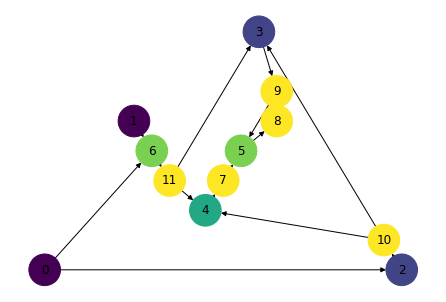

In [173]:
G = circuit_generator(2,0.4)
nx.draw(G, with_labels = True, node_size=1000,pos=nx.planar_layout(G), node_color=[G.nodes[n]['color'] for n in G])

In [14]:
def calculate_aux(G, node):
    if G.nodes[node]['type'] == 'INPUT':
        return G.nodes[node]['val']
    elif G.nodes[node]['type'] == 'OUTPUT' or G.nodes[node]['type'] == "WIRE" :
        next_node = list(G.edges(node))[0][1]
        return calculate_aux(G,next_node)
    elif G.nodes[node]['type'] == 'NOT':
        next_node = list(G.edges(node))[0][1]
        return  not calculate_aux(G,next_node)
    elif G.nodes[node]['type'] == 'AND':
        next_nodes = [a[1] for a in list(G.edges(node))]
        result = [calculate_aux(G,a) for a in next_nodes]
        return all(result)
    else:
        next_nodes = [a[1] for a in list(G.edges(node))]
        result = [calculate_aux(G,a) for a in next_nodes]
        return any(result)
            


def calculate(G,values):
    inputs = [v for v in G if G.nodes[v]['type'] == 'INPUT']
    for v in range(len(inputs)):
        G.nodes[inputs[v]]['val'] = values[v]
    output = len(G) -1
    return calculate_aux(G,output)

    

In [15]:
calculate(G,[1,1])

True

In [175]:
print(G.out_degree[9])

1
